In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from heptracktool.io.muon_collider_track_data import MuonColliderTrackDataReader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
input_dir = "/global/cfs/cdirs/m3443/data/TrackingInMuonCollider/singleMuonV2/New"
output_dir = "/global/cfs/cdirs/m3443/data/TrackingInMuonCollider/singleMuonV2_feature_store"
reader = MuonColliderTrackDataReader(
    input_dir=input_dir,
    output_dir=output_dir,
    overwrite=False)

2025-10-24 10:17:00.597 | INFO     | heptracktool.io.muon_collider_track_data:__init__:43 - Total 10000 events in directory: /global/cfs/cdirs/m3443/data/TrackingInMuonCollider/singleMuonV2/New


In [6]:
reader.all_evtids[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
spacepoints, particles, cells = reader.read(2)

2025-10-24 09:42:28.301 | DEBUG    | heptracktool.io.muon_collider_track_data:read:54 - Reading event id 2 from file /global/cfs/cdirs/m3443/data/TrackingInMuonCollider/singleMuonV2/New/Hits_TTree_4403_0-0.root


In [5]:
spacepoints

,hit_x,hit_y,hit_z,hit_toa,hit_energy,hit_is_from_secondary,hit_num_cells,hit_particle_id,hit_lx,hit_ly,hit_lphi,hit_lr2
0,-8.854717,50.516163,18.612501,0.106021,0.000056,1.0,9,0,4.0,6.000000,0.982794,52.000000
1,-22.201719,-71.004890,62.772503,0.275726,0.000132,1.0,5,0,3.0,1.000000,0.321751,10.000000
2,-20.873379,-71.308075,62.000000,0.247266,0.000117,1.0,4,0,2.0,1.000000,0.463648,5.000000
3,-7.256389,30.165001,-29.137499,0.052554,0.000128,1.0,9,0,1.0,5.999992,1.405647,36.999908
4,-5.442500,30.165001,-27.025000,0.272779,0.000021,1.0,4,0,2.0,1.000000,0.463648,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5631930,461.393402,-980.575745,-1615.851440,6.561727,0.000036,1.0,1,0,0.0,0.000000,0.000000,0.000000
5631931,461.231720,-980.642761,-1615.851440,6.552336,0.000035,1.0,2,0,1.0,0.000000,0.000000,1.000000
5631932,1066.227417,117.951523,-1878.148560,7.403077,0.000146,1.0,1,0,0.0,0.000000,0.000000,0.000000
5631933,1067.212891,110.466118,-1615.851440,6.490463,0.000027,1.0,1,0,0.0,0.000000,0.000000,0.000000


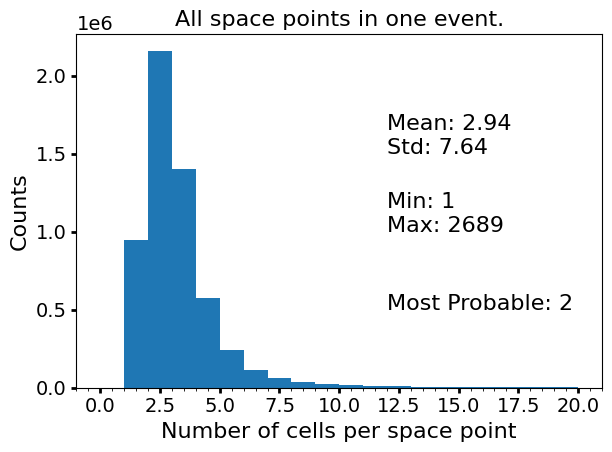

In [16]:
hit_num_cells = spacepoints["hit_num_cells"]
plt.hist(hit_num_cells, bins=20, range=(0, 20))
plt.xlabel("Number of cells per space point")
plt.ylabel("Counts")
# add mean and std in text
mean = np.mean(hit_num_cells)
std = np.std(hit_num_cells)
min_val = np.min(hit_num_cells)
max_val = np.max(hit_num_cells)
most_prob_val = np.bincount(hit_num_cells).argmax()
# use relative positioning for text
plt.text(12, 1.5e6, f"Mean: {mean:.2f}\nStd: {std:.2f}")
plt.text(12, 1.0e6, f"Min: {min_val}\nMax: {max_val}")
plt.text(12, 5.0e5, f"Most Probable: {most_prob_val}")
plt.title("All space points in one event.")
plt.show()


In [17]:
signal_hits = spacepoints[spacepoints["hit_is_from_secondary"] == 0.0]

In [ ]:
import loguru as logger
# log info level
logger.logger.remove()
logger.logger.add(lambda msg: print(msg, end=''), level="INFO")

all_signal_hits = []
for idx in range(reader.nevts)[:5000]:
    spacepoints, _ = reader.read(idx)
    signal_hits = spacepoints[spacepoints["hit_is_from_secondary"] == 0.0]
    all_signal_hits.append(signal_hits)

In [19]:
particles

,par_vx,par_vy,par_vz,par_px,par_py,par_pz,par_id,par_pdg_id,par_charge,part_id
0,0.0,0.0,0.0,-4199.793945,956.902832,-15481.561523,0.0,13.0,-1.0,123


In [20]:
cells

,cell_x,cell_y,cell_toa,cell_energy
0,60.500008,-293.499969,0.149183,759.5
1,60.500008,-292.499969,0.093855,759.5
2,61.500008,-294.499969,0.113493,2257.5
3,61.500008,-293.499969,0.097303,1309.5
4,62.500008,-296.499969,0.105748,759.5
...,...,...,...,...
16570181,-1017.436462,-4.360150,6.515291,2119.0
16570182,-1016.436462,-4.360150,6.589381,7286.0
16570183,444.563568,-3.360150,7.403077,39417.0
16570184,595.563538,-3.360150,6.490463,7286.0


In [22]:
num_cells = spacepoints["hit_num_cells"].to_numpy()
cell_hit_id = np.repeat(np.arange(len(num_cells)), num_cells)

In [24]:
cell_hit_id.shape, cells.shape

((16570186,), (16570186, 4))

In [ ]:
ce

In [2]:
import uproot

file_name = "/global/cfs/projectdirs/atlas/arastogi/MuonCollider/data/MAIA/RealDigi/WithBIB/BIB_TTree/New/Hits_TTree_002_0-0.root"
tree = uproot.open(file_name)["HitTree"]

In [3]:
tree.keys()

['Cluster_x',
 'Cluster_y',
 'Cluster_z',
 'Cluster_ArrivalTime',
 'Cluster_EnergyDeposited',
 'Cluster_isFromSecondary',
 'Cluster_Npixels',
 'PixelHits_x',
 'PixelHits_y',
 'PixelHits_ArrivalTime',
 'PixelHits_EnergyDeposited',
 'MCP_Vx',
 'MCP_Vy',
 'MCP_Vz',
 'MCP_Px',
 'MCP_Py',
 'MCP_Pz',
 'MCP_ID',
 'MCP_PDGID',
 'MCP_Charge']

In [6]:
from heptracktool.io.utils_mcollider_data import cell_branch_names, cell_col_names
from heptracktool.io import utils_mcollider_data as utils

In [7]:
event_info = tree.arrays(list(utils.translator.keys()), library="np")  # type: ignore

In [8]:
event_info["Cluster_x"][0].shape

(5871357,)

In [9]:
tree["MCP_ID"].array(library="np")

array([array([0.], dtype=float32)], dtype=object)

In [10]:
hit_x = tree["Cluster_x"].array(library="np")[0]
print("number of hits: ", hit_x.shape)
hit_num_cells = tree["Cluster_Npixels"].array(library="np")[0]
print("number of cells per hit: ", hit_num_cells.shape)
print("total number of cells: ", hit_num_cells.sum())

cell_x = tree["PixelHits_x"].array(library="np")[0]
print("total number of cells from cell_x: ", cell_x.size)

number of hits:  (5871357,)
number of cells per hit:  (5871357,)
total number of cells:  17334712
total number of cells from cell_x:  17334712


In [16]:
tree["PixelHits_x"].array(library="np")[0]

array([   92.50001,    92.50001,    93.50001, ..., -2343.4365 ,
         738.56354,   739.56354], shape=(17334712,), dtype=float32)

In [17]:
import pandas as pd
cell_arrays = [tree[x].array(library="np")[0] for x in utils.cell_branch_names]
cells = pd.DataFrame(dict(zip(utils.cell_col_names, cell_arrays)))

In [18]:
cells

,cell_x,cell_y,cell_toa,cell_energy
0,92.500008,-355.499969,0.061410,3893.0
1,92.500008,-354.499969,0.111424,5112.0
2,93.500008,-356.499969,0.116392,578.5
3,93.500008,-355.499969,0.189268,11575.0
4,104.500008,-308.499969,0.156965,1719.5
...,...,...,...,...
17334707,998.563538,-0.360150,4.966007,6712.5
17334708,-2344.436523,9.639850,8.323854,6712.5
17334709,-2343.436523,9.639850,8.317930,2964.5
17334710,738.563538,-4.360150,6.330086,15199.5


In [ ]:
from pathlib import Path
import re

inputdir = Path("/global/cfs/cdirs/m3443/data/TrackingInMuonCollider/singleMuon")
all_evts = list(inputdir.glob("*.root"))

file_name_pattern = "Hits_TTree_([0-9]+)_([0-9]+)-([0-9]+).root"
all_evtids = sorted([
    int(re.search(file_name_pattern, x.name).group(1).strip()) for x in all_evts
])

In [ ]:
all_evtids

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185